In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('data_matched_with_secret_type.csv', delimiter = "\t", index_col = 0)
data.head(5)
data.describe()

,Score
count,1032.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [ ]:
data.head(5)

,Organization,Extension,Path,Score,URL,Match,Secret Type
0,Apple,pem private user,Tests/PackageCollectionSignerExecutableTests/...,1,https://github.com/apple/swift-package-collect...,True,SSH (EC) private key
1,Apple,pem private user,deps/src/openssl-1.0.2t/demos/sign/key.pem,1,https://github.com/apple/turicreate/blob/8896b...,True,RSA private key
2,Apple,pem private user,deps/src/openssl-1.0.2t/test/testrsa.pem,1,https://github.com/apple/turicreate/blob/8896b...,True,RSA private key
3,Apple,pem private user,deps/src/openssl-1.0.2t/apps/s512-key.pem,1,https://github.com/apple/turicreate/blob/8896b...,True,RSA private key
4,Apple,pem private user,deps/src/openssl-1.0.2t/demos/privkey.pem,1,https://github.com/apple/turicreate/blob/8896b...,True,RSA private key


In [ ]:
data = data[data['Secret Type'] != 'None']
data_1 = data.groupby(["Organization", "Secret Type"]).size().reset_index(name='Count')
data_1

,Organization,Secret Type,Count
0,Apple,Generic Secret,4
1,Apple,RSA private key,51
2,Apple,SSH (DSA) private key,4
3,Apple,SSH (EC) private key,2
4,Facebook,RSA private key,1
5,Google,Google YouTube OAuth,1
6,Google,Password in URL,3
7,Google,RSA private key,45
8,Google,SSH (DSA) private key,4
9,Google,SSH (EC) private key,20


<Figure size 2160x1800 with 0 Axes>

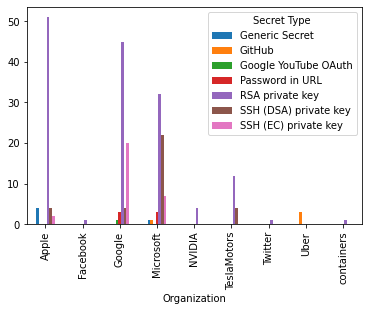

In [ ]:
plt.figure(figsize=(30,25))
data.groupby(['Organization','Secret Type'])['Secret Type'].count().unstack().plot(kind='bar')
plt.show()

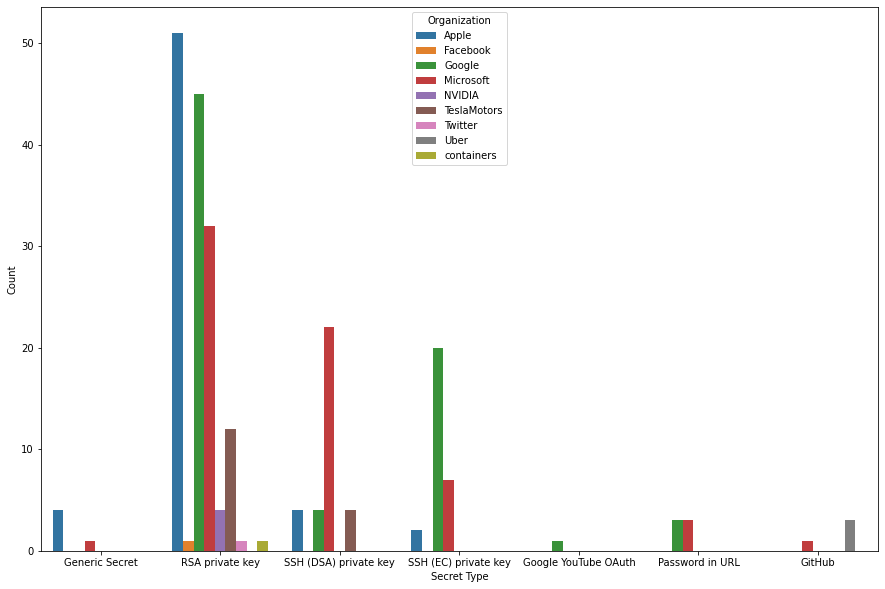

In [ ]:
plt.figure(figsize=(15,10))
sns.barplot(data=data_1, x="Secret Type", y="Count", hue="Organization")
plt.show()

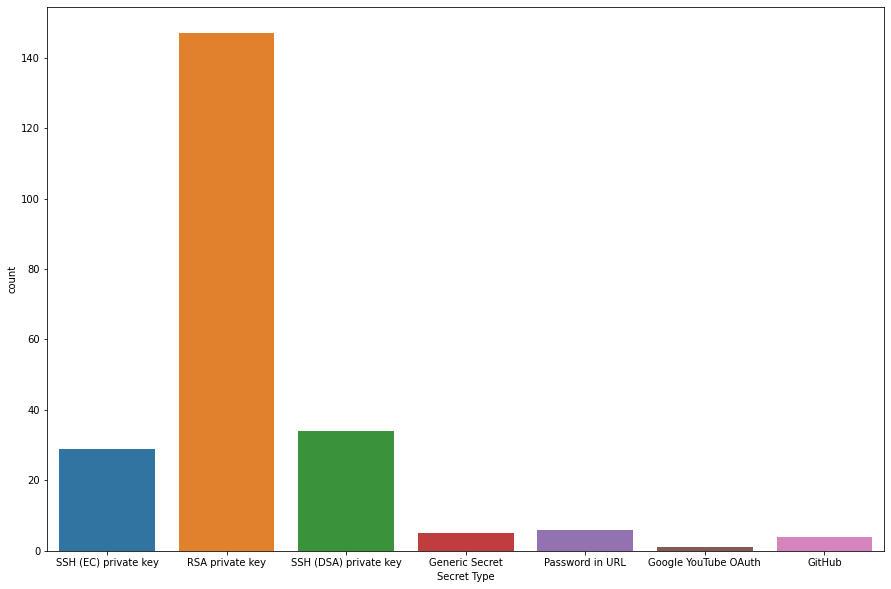

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(x=data["Secret Type"])
plt.show()

<Figure size 1080x720 with 0 Axes>

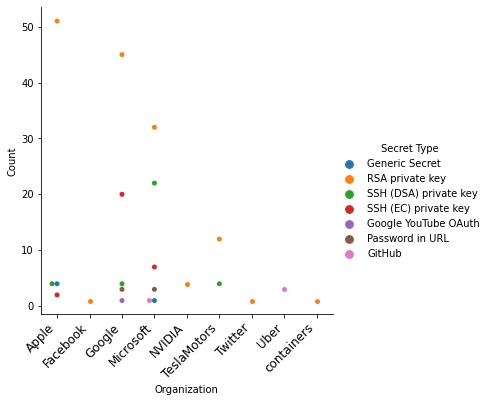

In [ ]:
plt.figure(figsize=(15,10))
sns.catplot(data=data_1, x="Organization", y="Count", hue="Secret Type", kind="swarm")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.show()